## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, I will find the results of an A/B test run by an e-commerce website.  My goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.shape[0]

294478

##### There are 294478 rows in the dataset

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

##### There are 290584 unique users out of the 294478

In [5]:
sum(df["converted"])/df.shape[0]


0.11965919355605512

##### The percentage of users who converted is around 12%

In [6]:
df.query("group == 'control' and landing_page == 'new_page'").shape[0] + df.query("group == 'treatment' and landing_page == 'old_page'").shape[0]

3893

##### 3893 times the new page and treatment didn't line up

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


##### There are no missing values

In [8]:
df2=df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]

#####  A new data frame is created by removing all the rows where treatment is not aligned with new_page or control is not aligned with old_page.

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [10]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

##### There is one duplicated user

In [11]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


##### The duplicated user has a user_id of 773192

In [12]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


##### The duplicated users are found on rows 1899 & 2893

In [13]:
df2.drop(index=2893,inplace=True)

/Users/abdullah/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##### The duplicated user on row 2893 is removed from the dataframe

In [14]:
sum(df2["converted"])/df2.shape[0]


0.11959708724499628

##### The probability of an individual converting is 0.119

In [15]:
sum(df2.query("group =='control'")["converted"])/df2.query("group =='control'").shape[0]

0.1203863045004612

##### The probability of an individual from the control group converting is 0.12

In [16]:
sum(df2.query("group =='treatment'")["converted"])/df2.query("group =='treatment'").shape[0]

0.11880806551510564

##### The probability of an individual from the treatment group converting is 0.118

d. What is the probability that an individual received the new page?

In [17]:
df2.query("landing_page =='new_page'").shape[0]/df2.shape[0]

0.5000619442226688

##### half of the individuals received the new page

#### Since half of the individuals received the new page and the other half received the old one thus half of them are in the control group and the other half are in the treatment group and where the control group had a slightly higher conversion probability than the treatment group, we can say that the old page leads to slightly more conversions than the new page

<a id='ab_test'></a>
### Part II - A/B Test


##### Null Hypothesis : The old page is better than the new page or equally good to it.
##### Alternative Hypothesis : The new page is better than the old page.
$ \alpha = 0.05 $

In [18]:
df2['converted'].mean()

0.11959708724499628

##### assuming that Pnew = to the converted rate in ab_data.csv regardless of the page then Pnew = 0.119

In [19]:
df2['converted'].mean()

0.11959708724499628

##### assuming that Pold = to the converted rate in ab_data.csv regardless of the page then Pold = 0.119

In [20]:
df2[df2['landing_page']=='new_page'].shape[0]

145310

##### n new = 145310

In [21]:
df2[df2['landing_page']=='old_page'].shape[0]

145274

##### n old = 145274

In [22]:
new_page_converted = []
for _ in range(145310):
    sample = np.random.choice(2, p=[0.881, 0.119], replace=True)
    new_page_converted.append(sample)

In [23]:
old_page_converted = []
for _ in range(145274):
    sample = np.random.choice(2, p=[0.881, 0.119], replace=True)
    old_page_converted.append(sample)

In [24]:
sum(old_page_converted)/len(old_page_converted)

0.11888569186502747

In [25]:
sum(new_page_converted)/len(new_page_converted)

0.11940678549308376

In [26]:
sum(new_page_converted)/len(new_page_converted) - sum(old_page_converted)/len(old_page_converted)

0.0005210936280562878

In [27]:
p_new, p_old, p_diffs = [], [], []

for _ in range(10000):
    bootsamp = df2.sample(200, replace = True)
    p_new_samp = bootsamp[bootsamp['landing_page']=='new_page']['converted'].mean()
    p_old_samp = bootsamp[bootsamp['landing_page']=='old_page']['converted'].mean()

    p_new.append(p_new_samp)
    p_old.append(p_old_samp)
    p_diffs.append(p_new_samp - p_old_samp)  

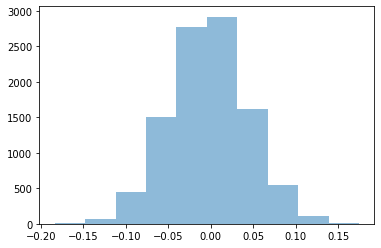

In [28]:
plt.hist(p_diffs, alpha = 0.5);

##### The plot looks just as expercted according to the central limit theorem in addition for it being centered at 0.

In [29]:
np.std(p_diffs)

0.04556027338487988

In [30]:
null_vals = np.random.normal(0, np.std(p_diffs), 10000)

In [31]:
sample_mean = sum(new_page_converted)/len(new_page_converted) - sum(old_page_converted)/len(old_page_converted)

In [32]:
(null_vals>sample_mean).mean()

0.5035

##### 0.5035 of the p_diffs are greater than the actual difference observed in ab_data.csv

##### the number found in j is the p value which is the probability of observing your statistic if the null value is true thus here we have a p value of 0.5035 which suggest that we should stick to the null hypothesis and reject the new page.

In [33]:
import statsmodels.api as sm

convert_old = sum(df2[df2['landing_page']=='old_page']['converted'])
convert_new = sum(df2[df2['landing_page']=='new_page']['converted'])
n_old = df2[df2['landing_page']=='old_page'].shape[0]
n_new = df2[df2['landing_page']=='new_page'].shape[0]

In [34]:
sm.stats.proportions_ztest(count=convert_old,nobs=n_old,value=0.5)

(-444.63258480571153, 0.0)

**The z-score is -444 and the p-value is 0 thus we should stick to the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

##### Since its is categorical and not quantitative, Multiple linear regression should be performed in this case.

In [35]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [36]:
landing_page_dummies = pd.get_dummies(df2['landing_page'])
group_dummies = pd.get_dummies(df2['group'])
df3 = df2.join(landing_page_dummies).join(group_dummies)
df3.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,1,0


In [37]:
df3.drop(columns=['old_page','control'], inplace=True)
df3.head()

,user_id,timestamp,group,landing_page,converted,new_page,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,0


In [38]:
df3.rename(columns={'treatment':'ab_page'},inplace=True)

In [39]:
df3['intercept'] = 1


In [40]:
lm = sm.OLS(df3['converted'], df3[['intercept', 'new_page', 'ab_page']])
results = lm.fit()


In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Fri, 26 Jun 2020   Prob (F-statistic):              0.190
Time:                        17:38:58   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
new_page      -0.0008      0.001     -1.311      0.190      -0.002       0.000
ab_page       -0.0008      0.001     -1.311      0.190      -0.002       0.000
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                     1.50e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.2e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**the p-value = 0.19 while in part II the p-value was 0.5279 thus this show that we should choose the alternative hypothesis**

**Adding other factors to the regression model is a good idea for example studying the time might give us a better understanding of wether the new page is better than the old one or not.**

In [42]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')

In [43]:
df_new.sample(10)

,country,timestamp,group,landing_page,converted,new_page,ab_page,intercept
user_id,,,,,,,,
922487,UK,2017-01-07 19:11:14.797797,treatment,new_page,0,1,1,1
819229,US,2017-01-07 19:56:52.334880,control,old_page,0,0,0,1
682387,US,2017-01-11 00:37:47.911251,control,old_page,0,0,0,1
648525,US,2017-01-19 20:24:56.524049,treatment,new_page,0,1,1,1
879044,US,2017-01-13 09:07:12.557091,treatment,new_page,0,1,1,1
633810,CA,2017-01-19 02:57:04.767724,control,old_page,0,0,0,1
796403,US,2017-01-12 17:32:21.993063,treatment,new_page,0,1,1,1
655614,UK,2017-01-06 10:02:07.549099,control,old_page,0,0,0,1
903180,US,2017-01-20 08:27:28.685935,treatment,new_page,0,1,1,1


In [44]:
country_dummies = pd.get_dummies(df_new['country'])
df_new2 = df_new.join(country_dummies)
df_new2.head()

,country,timestamp,group,landing_page,converted,new_page,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0


In [45]:
df_new2['intercept'] = 1
lm = sm.OLS(df_new2['converted'], df_new2[['intercept', 'new_page', 'ab_page','CA','UK']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Fri, 26 Jun 2020   Prob (F-statistic):              0.178
Time:                        17:39:01   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290580   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1203      0.001    128.267      0.000       0.118       0.122
new_page      -0.0008      0.001     -1.307      0.191      -0.002       0.000
ab_page       -0.0008      0.001     -1.307      0.191      -0.002       0.000
CA            -0.0042      0.003     -1.514      0.130      -0.010       0.001
UK             0.0010      0.001      0.744      0.457      -0.002       0.004
==============================================================================
Omnibus:                   125551.169   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.780
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                     4.45e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.59e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**As the summary shows, CA rate of conversion is 0.0042 less than the US while that of the UK is 0.001 more than that of the US. Moreover, the rate of conversion for the new page is a little less than that of the old page. Thus it would be best to stick to the old page**